In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [3]:
df = pd.read_csv("nhsDataFinal_strictLGA.csv")

In [4]:
df.head()

,Participant ID,GDMDiagnosisDate,estimatedDeliveryDate,maternalAgeAtBirth,OGTTfasting,OGTT2hour,maternalWeightAtBooking,maternalHeight,maternalBMIAtBooking,maternalWeight3rdTrimester,...,AC_38Weeks,EFW_38Weeks,foetalDOB,vaginalBirth,caesareanBirth,foetalSex,foetalWeightInGrams,gestationalAgeAtDeliveryInWeeks,lga,birthOutcome
0,BRA001,04/06/2019,12/11/2019,32,6.1,5.2,76.8,167,26.9,84.1,...,NaN,NaN,10/11/2019,YES,NO,F,3490,40,NO,LIVEBIRTH
1,BRA002,30/05/2019,31/08/2019,20,5.1,7.8,62.0,163,23.0,69.2,...,319.9,2927.0,02/09/2019,YES,NO,F,3980,40,NO,LIVEBIRTH
2,BRA003,03/06/2019,02/09/2019,32,6.6,10.4,84.0,159,33.2,93.5,...,328.7,3265.0,19/08/2019,YES,NO,F,2960,38,NO,LIVEBIRTH
3,BRA004,05/06/2019,08/09/2019,30,4.3,8.4,63.5,163,23.9,68.3,...,342.0,3271.0,24/08/2019,NO,YES,M,3400,39,NO,LIVEBIRTH
4,BRA005,10/06/2019,18/10/2019,39,4.8,9.0,86.2,162,32.8,93.5,...,NaN,NaN,10/10/2019,YES,NO,F,3330,38,NO,LIVEBIRTH


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Participant ID                   196 non-null    object 
 1   GDMDiagnosisDate                 196 non-null    object 
 2   estimatedDeliveryDate            196 non-null    object 
 3   maternalAgeAtBirth               196 non-null    int64  
 4   OGTTfasting                      196 non-null    float64
 5   OGTT2hour                        196 non-null    float64
 6   maternalWeightAtBooking          196 non-null    float64
 7   maternalHeight                   196 non-null    int64  
 8   maternalBMIAtBooking             196 non-null    float64
 9   maternalWeight3rdTrimester       196 non-null    float64
 10  prevMacrosomia                   196 non-null    object 
 11  eclampsiaFH                      196 non-null    object 
 12  gestationalPre-eclamps

In [6]:
df["lga"].value_counts()

NO     190
YES      6
Name: lga, dtype: int64

Text(0.5, 1.0, 'White/South-Asian Ratio')

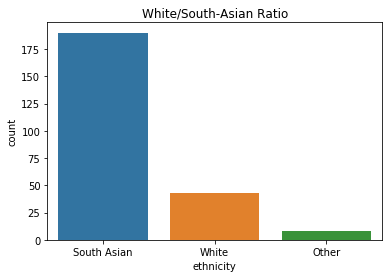

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualize lga/non-lga ratio
sns.countplot(x=df["lga"]).set_title("LGA/non-LGA Ratio")

# Visualize white/south-asian ratio
sns.countplot(x=df["ethnicity"]).set_title("White/South-Asian Ratio")


# Fill missing values with '0' for GDMMetforminGestWeek, GDMInsulinGestWeek
Missing values in GDMMetforminGestWeek and GDMInsulinGestWeek mean the patient was not prescribed insulin or metformin. 
Therefore, these values will be filled with 0s.

In DataCleaning file, a 2 boolean flag features was added to indicate if patient was prescribed insulin/ metformin or not. 

In [8]:
df['GDMMetforminGestWeek']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
191     NaN
192     NaN
193    28.0
194     NaN
195     NaN
Name: GDMMetforminGestWeek, Length: 196, dtype: float64

In [9]:
df['GDMInsulinGestWeek']

0       NaN
1       NaN
2      33.0
3       NaN
4       NaN
       ... 
191     NaN
192    28.0
193     NaN
194    28.0
195     NaN
Name: GDMInsulinGestWeek, Length: 196, dtype: float64

In [10]:
# fill NA with 0 
df['GDMMetforminGestWeek']= df['GDMMetforminGestWeek'].fillna(value=0)
df['GDMInsulinGestWeek']= df['GDMInsulinGestWeek'].fillna(value=0)

In [11]:
print(df['GDMMetforminGestWeek'])
print(df['GDMInsulinGestWeek'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
191     0.0
192     0.0
193    28.0
194     0.0
195     0.0
Name: GDMMetforminGestWeek, Length: 196, dtype: float64
0       0.0
1       0.0
2      33.0
3       0.0
4       0.0
       ... 
191     0.0
192    28.0
193     0.0
194    28.0
195     0.0
Name: GDMInsulinGestWeek, Length: 196, dtype: float64


In [12]:
# change type from float to int
df["GDMMetforminGestWeek"] = df["GDMMetforminGestWeek"].astype(int)
df["GDMInsulinGestWeek"] = df["GDMInsulinGestWeek"].astype(int)

In [13]:
print(df['GDMMetforminGestWeek'])
print(df['GDMInsulinGestWeek'])

0       0
1       0
2       0
3       0
4       0
       ..
191     0
192     0
193    28
194     0
195     0
Name: GDMMetforminGestWeek, Length: 196, dtype: int64
0       0
1       0
2      33
3       0
4       0
       ..
191     0
192    28
193     0
194    28
195     0
Name: GDMInsulinGestWeek, Length: 196, dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Participant ID                   196 non-null    object 
 1   GDMDiagnosisDate                 196 non-null    object 
 2   estimatedDeliveryDate            196 non-null    object 
 3   maternalAgeAtBirth               196 non-null    int64  
 4   OGTTfasting                      196 non-null    float64
 5   OGTT2hour                        196 non-null    float64
 6   maternalWeightAtBooking          196 non-null    float64
 7   maternalHeight                   196 non-null    int64  
 8   maternalBMIAtBooking             196 non-null    float64
 9   maternalWeight3rdTrimester       196 non-null    float64
 10  prevMacrosomia                   196 non-null    object 
 11  eclampsiaFH                      196 non-null    object 
 12  gestationalPre-eclamps

# Missing Values in Variance and Standard Deviation

In [15]:
# fill missing values for varBG and stdBG with 0 as in these cases only one BG measurment exists and therefore variance = std = 0
df['varBG']= df['varBG'].fillna(value=0)
df['stdBG']= df['stdBG'].fillna(value=0)

# Calculate % of missing values per feature

In [16]:
# calculate percentage of missing data
missing_values = (df.isna().mean().round(4) * 100)

missing_values

Participant ID                      0.00
GDMDiagnosisDate                    0.00
estimatedDeliveryDate               0.00
maternalAgeAtBirth                  0.00
OGTTfasting                         0.00
OGTT2hour                           0.00
maternalWeightAtBooking             0.00
maternalHeight                      0.00
maternalBMIAtBooking                0.00
maternalWeight3rdTrimester          0.00
prevMacrosomia                      0.00
eclampsiaFH                         0.00
gestationalPre-eclampsia            0.00
pcos                                0.00
hypertensionFH                      0.00
gestationalHypertension             0.00
ethnicity                           0.00
gestationalAgeAtGDMDiagnosis        0.00
gravidity                           0.00
parity                              0.00
previousGDM                         0.00
familyHistoryDiabetes               0.00
familyHistoryGDM                    0.00
GDMLifestyleGestWeek                0.00
GDMDietGestWeek 

# Remove features with high % of missing values

In [17]:
#df['AC_28-30Weeks'] = df[['AC_28Weeks', 'AC_30Weeks']].mean(axis=1)
#df['EFW_28-30Weeks'] = df[['EFW_28Weeks', 'EFW_30Weeks']].mean(axis=1)

#df['AC_32-34Weeks'] = df[['AC_32Weeks', 'AC_34Weeks']].mean(axis=1)
#df['EFW_32-34Weeks'] = df[['EFW_32Weeks', 'EFW_34Weeks']].mean(axis=1)

#df['AC_36-38Weeks'] = df[['AC_36Weeks', 'AC_38Weeks']].mean(axis=1)
#df['EFW_36-38Weeks'] = df[['EFW_36Weeks', 'EFW_38Weeks']].mean(axis=1)

In [18]:
print((df.isnull().sum()/len(df)*100).nlargest(n=14))

AC_38Weeks     73.979592
EFW_38Weeks    73.979592
AC_30Weeks     59.693878
EFW_30Weeks    59.693878
AC_34Weeks     59.183673
EFW_34Weeks    59.183673
AC_28Weeks     50.510204
EFW_28Weeks    50.510204
EFW_32Weeks    37.755102
AC_32Weeks     37.244898
AC_36Weeks     23.979592
EFW_36Weeks    23.979592
AC_20Weeks     18.367347
EFW_20Weeks    18.367347
dtype: float64


In [19]:
# remove AC_38Weeks & EFW_38Weeks due to high % missing values (73.98)
df = df.drop(columns =['AC_38Weeks', 'EFW_38Weeks'])

# Convert Dates to DateTime type

In [20]:
#convert all dates to datetime
df['GDMDiagnosisDate'] = pd.to_datetime(df['GDMDiagnosisDate'], dayfirst=True)
df['estimatedDeliveryDate'] = pd.to_datetime(df['estimatedDeliveryDate'], dayfirst=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Participant ID                   196 non-null    object        
 1   GDMDiagnosisDate                 196 non-null    datetime64[ns]
 2   estimatedDeliveryDate            196 non-null    datetime64[ns]
 3   maternalAgeAtBirth               196 non-null    int64         
 4   OGTTfasting                      196 non-null    float64       
 5   OGTT2hour                        196 non-null    float64       
 6   maternalWeightAtBooking          196 non-null    float64       
 7   maternalHeight                   196 non-null    int64         
 8   maternalBMIAtBooking             196 non-null    float64       
 9   maternalWeight3rdTrimester       196 non-null    float64       
 10  prevMacrosomia                   196 non-null    object       

# Define Matrix of Features and Matrix of Dependent Variable for Classfication

In [22]:
# Drop features after prediction point 

df1 = df.drop(columns =['foetalDOB', 'vaginalBirth', 'caesareanBirth',
                      'foetalSex', 'foetalWeightInGrams', 
                       'gestationalAgeAtDeliveryInWeeks', 'birthOutcome',
                       'GDMDiagnosisDate','GDMDiagnosisDate'])

# Define X and y for classification
X = df1.drop(columns=['lga','Participant ID'])
y = df1['lga']

#print(X)
#print(y)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   estimatedDeliveryDate         196 non-null    datetime64[ns]
 1   maternalAgeAtBirth            196 non-null    int64         
 2   OGTTfasting                   196 non-null    float64       
 3   OGTT2hour                     196 non-null    float64       
 4   maternalWeightAtBooking       196 non-null    float64       
 5   maternalHeight                196 non-null    int64         
 6   maternalBMIAtBooking          196 non-null    float64       
 7   maternalWeight3rdTrimester    196 non-null    float64       
 8   prevMacrosomia                196 non-null    object        
 9   eclampsiaFH                   196 non-null    object        
 10  gestationalPre-eclampsia      196 non-null    object        
 11  pcos                          19

# Define Prediction Pipeline

In [24]:
def encode(y):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    return y

In [25]:
# this method is to retreive column names after one hot encoding

def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []

    for transformer_in_columns in column_transformer.transformers_[:-1]: #the last transformer is ColumnTransformer's 'remainder'
        print('\n\ntransformer: ', transformer_in_columns[0])
        
        raw_col_name = list(transformer_in_columns[2])
        
        if isinstance(transformer_in_columns[1], Pipeline): 
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
            
        try:
          if isinstance(transformer, OneHotEncoder):
            names = list(transformer.get_feature_names(raw_col_name))
            
          elif isinstance(transformer, SimpleImputer) and transformer.add_indicator:
            missing_indicator_indices = transformer.indicator_.features_
            missing_indicators = [raw_col_name[idx] + '_missing_flag' for idx in missing_indicator_indices]

            names = raw_col_name + missing_indicators
            
          else:
            names = list(transformer.get_feature_names())
          
        except AttributeError as error:
          names = raw_col_name
        
        print(names)    
        
        col_name.extend(names)
            
    return col_name

In [26]:
def preprocess (X):
    
    from sklearn.compose import ColumnTransformer, make_column_selector as selector
    from sklearn.impute import KNNImputer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split

    # define categorical and numeric transformers
    numeric_transformer = Pipeline(steps=[
        ('knnImputer', KNNImputer(n_neighbors=2, weights="uniform")),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    #  dispatch object columns to the categorical_transformer and remaining columns to numerical_transformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, selector(dtype_include=['float64','int64'])),
        ('cat', categorical_transformer, selector(dtype_include=['object']))
        
    ])

    X = pd.DataFrame(preprocessor.fit_transform(X))
    
    newColNames=get_column_names_from_ColumnTransformer(preprocessor)
    newColNames
    X.columns = newColNames

        
    return X

In [27]:
#y.to_csv("dependentVariableLGA.csv", index=False)
#X.to_csv("featuresMatrix.csv", index=False)

In [28]:
import warnings
warnings.filterwarnings("ignore")

y = encode(y)
X = preprocess(X)


# Split data into training and testing data
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



transformer:  num
['maternalAgeAtBirth', 'OGTTfasting', 'OGTT2hour', 'maternalWeightAtBooking', 'maternalHeight', 'maternalBMIAtBooking', 'maternalWeight3rdTrimester', 'gestationalAgeAtGDMDiagnosis', 'gravidity', 'parity', 'GDMLifestyleGestWeek', 'GDMDietGestWeek', 'GDMMetforminGestWeek', 'GDMInsulinGestWeek', 'meanBG', 'maxBG', 'minBG', 'varBG', 'countBG', 'stdBG', 'lowBG', 'normalBG', 'highBG', 'AC_20Weeks', 'EFW_20Weeks', 'AC_28Weeks', 'EFW_28Weeks', 'AC_30Weeks', 'EFW_30Weeks', 'AC_32Weeks', 'EFW_32Weeks', 'AC_34Weeks', 'EFW_34Weeks', 'AC_36Weeks', 'EFW_36Weeks']


transformer:  cat
['prevMacrosomia_NO', 'prevMacrosomia_YES', 'eclampsiaFH_NO', 'gestationalPre-eclampsia_NO', 'gestationalPre-eclampsia_YES', 'pcos_NO', 'pcos_YES', 'hypertensionFH_NO', 'hypertensionFH_YES', 'gestationalHypertension_NO', 'gestationalHypertension_YES', 'ethnicity_Other', 'ethnicity_South Asian', 'ethnicity_White', 'previousGDM_No', 'previousGDM_Yes', 'familyHistoryDiabetes_NO', 'familyHistoryDiabetes_Y

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   maternalAgeAtBirth            196 non-null    float64
 1   OGTTfasting                   196 non-null    float64
 2   OGTT2hour                     196 non-null    float64
 3   maternalWeightAtBooking       196 non-null    float64
 4   maternalHeight                196 non-null    float64
 5   maternalBMIAtBooking          196 non-null    float64
 6   maternalWeight3rdTrimester    196 non-null    float64
 7   gestationalAgeAtGDMDiagnosis  196 non-null    float64
 8   gravidity                     196 non-null    float64
 9   parity                        196 non-null    float64
 10  GDMLifestyleGestWeek          196 non-null    float64
 11  GDMDietGestWeek               196 non-null    float64
 12  GDMMetforminGestWeek          196 non-null    float64
 13  GDMIn

In [30]:
X.head()

,maternalAgeAtBirth,OGTTfasting,OGTT2hour,maternalWeightAtBooking,maternalHeight,maternalBMIAtBooking,maternalWeight3rdTrimester,gestationalAgeAtGDMDiagnosis,gravidity,parity,...,previousGDM_No,previousGDM_Yes,familyHistoryDiabetes_NO,familyHistoryDiabetes_YES,familyHistoryGDM_NO,familyHistoryGDM_YES,metforminFlag_NO,metforminFlag_YES,insulinFlag_NO,insulinFlag_YES
0,0.000957,0.854387,-2.331685,0.072814,0.936586,-0.447642,0.102661,-2.200631,0.677455,0.983536,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-2.250682,-0.212236,-0.764104,-0.892315,0.412098,-1.166654,-0.878398,0.342551,-0.443062,-0.976867,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.000957,1.387698,0.803478,0.542336,-0.112390,0.713838,0.721584,0.851188,2.358231,0.330068,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.374316,-1.065534,-0.402354,-0.794498,0.412098,-1.000728,-0.937656,0.596869,-0.443062,-0.976867,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.314414,-0.532223,-0.040605,0.685801,0.280976,0.640093,0.721584,-1.183358,2.358231,2.943939,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [39]:
# save preprocessed file to csv files
#X.to_csv("Preprocessed_ColumnsNamed_NHSDataFinal.csv", index=False)
#y.to_csv("dependentVariableLGAEncoded.csv", index=False)

In [31]:
# define a function that will evaluate the model performance 
def evaluate_model(y_test, y_pred):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    
    print('Classification Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
    print('Classification Error: %.3f' % (1 - metrics.accuracy_score(y_test, y_pred)))
    print('Sensitivity: %.3f' % metrics.recall_score(y_test, y_pred))
    print('Specificity: %.3f' % (TN / float(TN + FP)))
    print('False Positive Rate: %.3f' % (FP / float(TN + FP)))
    print('Precision: %.3f' % (TP / float(TP + FP)))
    print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
    print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))

Logistic Regression Evaluation Metrics:
Model score: 0.959


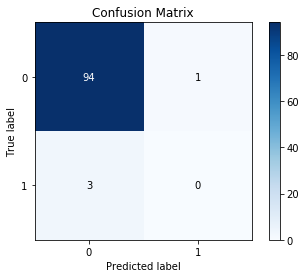

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.00      0.00      0.00         3

    accuracy                           0.96        98
   macro avg       0.48      0.49      0.49        98
weighted avg       0.94      0.96      0.95        98

Classification Accuracy: 0.959
Classification Error: 0.041
Sensitivity: 0.000
Specificity: 0.989
False Positive Rate: 0.011
Precision: 0.000
F1 Score: 0.000
AUC: 0.495


In [32]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
# set max_iter=400 to overcome algortihm not converging

clf.fit(X_train, y_train)
print("Logistic Regression Evaluation Metrics:")

print("Model score: %.3f" % clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

# store the predicted probabilities for class 1 (Baby is LGA)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred)

In [ ]:
# attempt threshold tuning

Best Threshold=0.024023, F-Score=nan


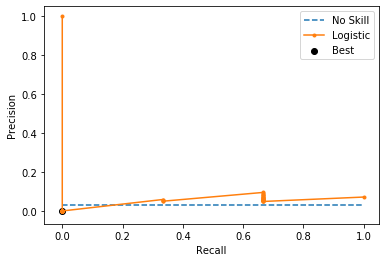

In [54]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)

print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [49]:
# predict labels
yhat = model.predict(testX)
# evaluate the model
score = f1_score(testy, yhat)
print('F-Score: %.5f' % score)

# Therefore, using a 0.5 threshold results in an F1 score of 0
# However, tuning threshold to 0.14 results in F1 score of 0.36

F-Score: 0.00000


In [48]:
# now tune using F0.5 score?

# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve


# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]

# define thresholds
thresholds = arange(0, 1, 0.001)

# define f0.5 score
from sklearn.metrics import fbeta_score
def f05(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5)

# evaluate each threshold
scores = [f05(testy, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F0.5-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.012, F0.5-Score=0.11494


In [52]:
y_pred = model.predict(X_test)

# evaluate the model
fbeta_score(testy, y_pred, beta=0.5)
fbeta_score(testy, to_labels(probs, 0.012), beta=0.5)

# Therefore, using a 0.5 threshold results in an F0.5 score of 0
# However, tuning threshold to 0.012 results in F1 score of 0.11

0.11494252873563218

IndexError: index 12 is out of bounds for axis 0 with size 3

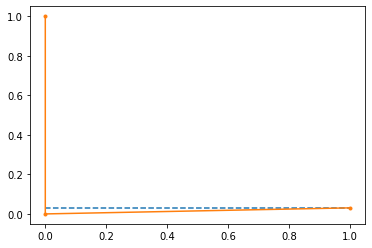

In [53]:
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)

# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()